MEAN, MEDIAN, AND STD DEV

Mean for Ammonium-N list: 4.446296296296297
Median for Ammonium-N list: 0.08
Standard Deviation for Ammonium-N list: 28.467944955445628
Mean for Orthophosphate list: 193.07481481481483
Median for Orthophosphate list: 45.435
Standard Deviation for Orthophosphate list: 1032.058079019495 

PEARSON AND SPEARMAN CORRELATION COEFFICIENT PVALUES

AMMONIUM-N LIST SPEARMAN AND PEARSON PVALUES
Pearson NHN P-value for {'Piney Point'} and: {'Bishop Harbor'} : 1.4964102856629427e-08
Spearman NHN P-value for {'Piney Point'} and: {'Bishop Harbor'} : 6.009732533640667e-07
Pearson NHN P-value for {'Piney Point'} and: {'Joe Bay'} : 6.221743926502448e-06
Spearman NHN P-value for {'Piney Point'} and: {'Joe Bay'} : 1.9612026876445915e-05
Pearson NHN P-value for {'Piney Point'} and: {'St.Joseph Sound'} : 0.0027369528710092924
Spearman NHN P-value for {'Piney Point'} and: {'St.Joseph Sound'} : 0.004906768128047501
Pearson NHN P-value for {'Bishop Harbor'} and: {'Piney Point'} : 1.4

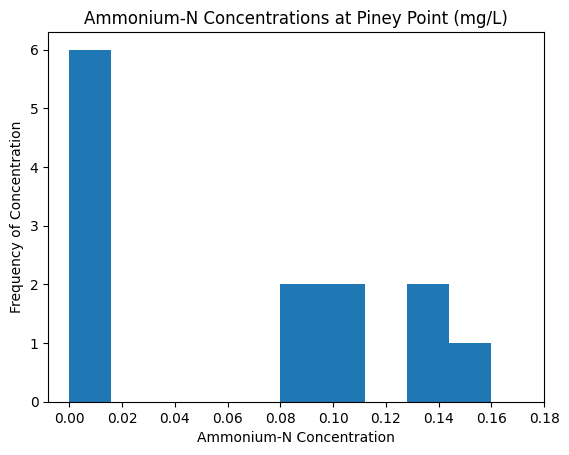

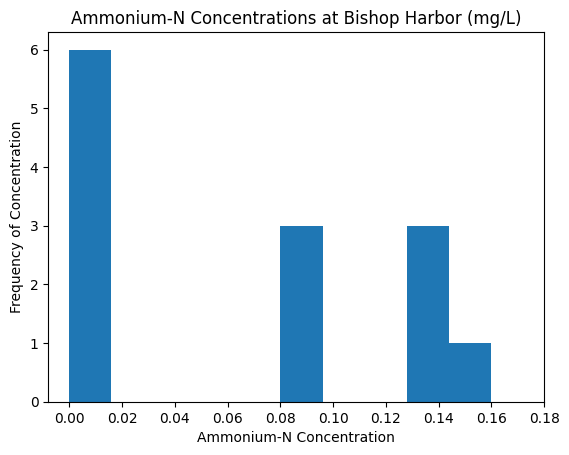

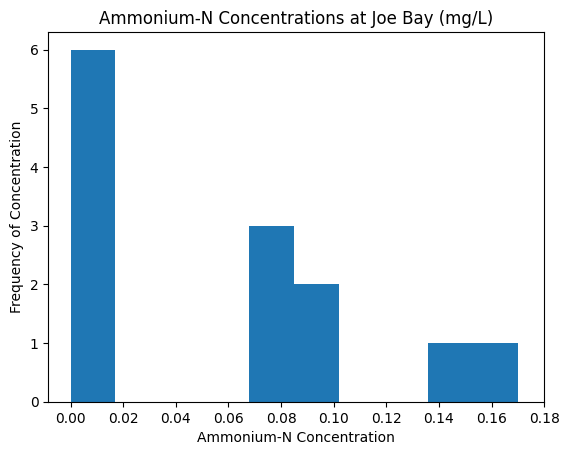

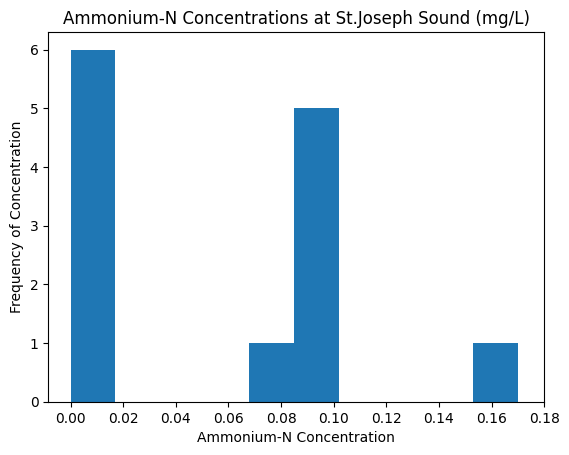

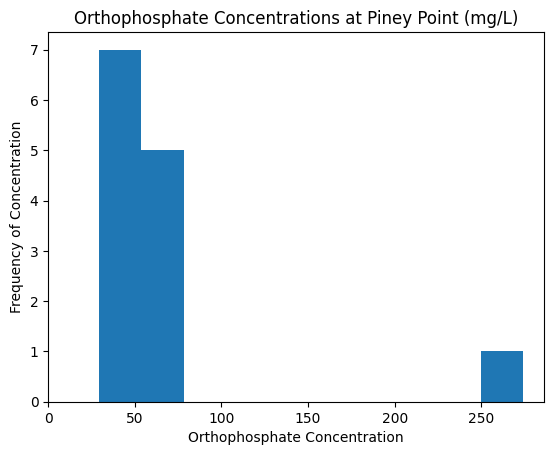

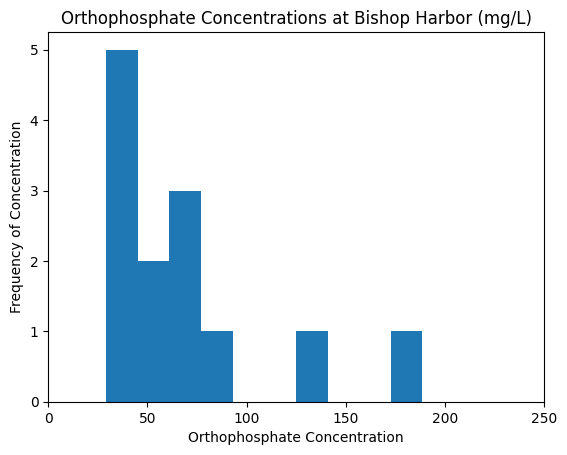

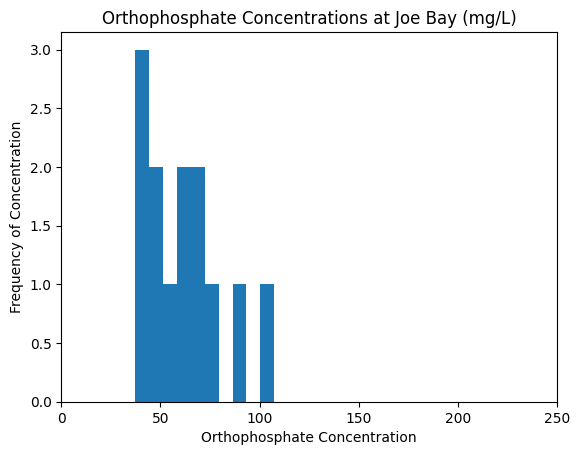

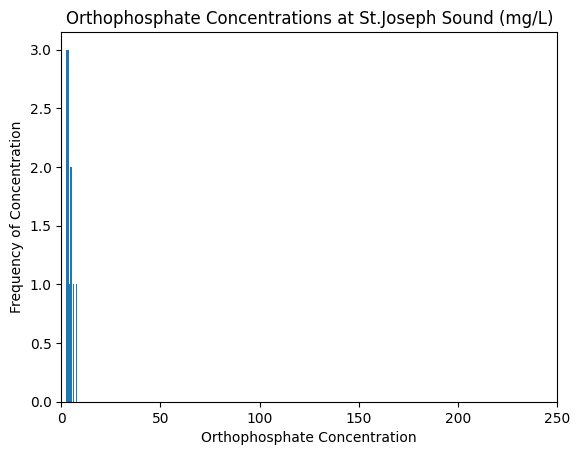

In [1]:
# Imports
import sys
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# File
file = open("Tampa Bay Supplementary Data Tables 1 and 2(1).txt")

# Header Tracker
First = True

# Empty Lists
NHN_list = []
Ortho_P_list = []
PCA_list = []

Piney_Point_NHN_list = []
Bishop_Harbor_NHN_list = []
Joe_Bay_NHN_list = []
St_Joseph_Sound_NHN_list = []

Piney_Point_Ortho_P_list = []
Bishop_Harbor_Ortho_P_list = []
Joe_Bay_Ortho_P_list = []
St_Joseph_Sound_Ortho_P_list = []

Piney_Point_year_list = []
Bishop_Harbor_year_list = []
Joe_Bay_year_list = []
St_Joseph_Sound_year_list = []

Piney_Point_month_list = []
Bishop_Harbor_month_list = []
Joe_Bay_month_list = []
St_Joseph_Sound_month_list = []

# for loop used to pull values from data set
for line in file:
    if First == True:
        data = line.split("\t")
        First = False
    else:
        data = line.split("\t")
        NHN_list.append(float(data[3]))
        Ortho_P_list.append(float(data[5]))
        if data[0] == "Piney Point" or data[0] == "Bishop Harbor" or data[0] == "Joe Bay" or data[0] == "St. Joseph Sound":
            PCA_list.append(data[3:6:2]) # Gathering quantative values for PCA calculation later
        if data[0] == "Piney Point":
            Piney_Point_NHN_list.append(float(data[3]))
            Piney_Point_Ortho_P_list.append(float(data[5]))
            Piney_Point_year_list.append((data[1]))
            Piney_Point_month_list.append(data[2]) 
        elif data[0] == "Bishop Harbor":
            Bishop_Harbor_NHN_list.append(float(data[3]))
            Bishop_Harbor_Ortho_P_list.append(float(data[5]))
            Bishop_Harbor_year_list.append((data[1]))  
            Bishop_Harbor_month_list.append((data[2]))  
        elif data[0] == "Joe Bay":
            Joe_Bay_NHN_list.append(float(data[3]))
            Joe_Bay_Ortho_P_list.append(float(data[5]))
            Joe_Bay_year_list.append((data[1]))
            Joe_Bay_month_list.append((data[2]))
        elif data[0] == "St. Joseph Sound":
            St_Joseph_Sound_NHN_list.append(float(data[3]))
            St_Joseph_Sound_Ortho_P_list.append(float(data[5]))
            St_Joseph_Sound_year_list.append((data[1]))
            St_Joseph_Sound_month_list.append((data[2]))

            
# Combine Year and Month lists
def combine_years_months(years, months):
    return [f"{year} {month}" for year, month in zip(years, months)]

PP_Sample_dates = combine_years_months(Piney_Point_year_list, Piney_Point_month_list)
BH_Sample_dates = combine_years_months(Bishop_Harbor_year_list, Bishop_Harbor_month_list)
JB_Sample_dates = combine_years_months(Joe_Bay_year_list, Joe_Bay_month_list)
SJS_Sample_dates = combine_years_months(St_Joseph_Sound_year_list, St_Joseph_Sound_month_list)

# Create numpy arrays with list values
np_PP_NHN = np.array(Piney_Point_NHN_list)
np_BH_NHN = np.array(Bishop_Harbor_NHN_list)
np_JB_NHN = np.array(Joe_Bay_NHN_list)
np_SJS_NHN = np.array(St_Joseph_Sound_NHN_list)
np_ALL_NHN = np.array([[Piney_Point_NHN_list], [Bishop_Harbor_NHN_list], [Joe_Bay_NHN_list], [St_Joseph_Sound_NHN_list]])

np_PP_Ortho_P = np.array(Piney_Point_Ortho_P_list)
np_BH_Ortho_P = np.array(Bishop_Harbor_Ortho_P_list)
np_JB_Ortho_P = np.array(Joe_Bay_Ortho_P_list)
np_SJS_Ortho_P = np.array(St_Joseph_Sound_Ortho_P_list)
np_ALL_Ortho_P = np.array([[Piney_Point_Ortho_P_list], [Bishop_Harbor_Ortho_P_list], [Joe_Bay_Ortho_P_list], [St_Joseph_Sound_Ortho_P_list]])

# Array Names for readability
names = ['Piney Point', 'Bishop Harbor', 'Joe Bay', 'St.Joseph Sound'] 
named_NHN_arrays = list(zip(names, np_ALL_NHN))
named_Ortho_P_arrays = list(zip(names, np_ALL_Ortho_P))


# 1 DATA DESCRIPTION: Mean, Median, and Std Deviation of important variables
print("MEAN, MEDIAN, AND STD DEV\n")
print("Mean for Ammonium-N list:", np.mean(NHN_list))
print("Median for Ammonium-N list:", np.median(NHN_list))
print("Standard Deviation for Ammonium-N list:", np.std(NHN_list))
print("Mean for Orthophosphate list:", np.mean(Ortho_P_list))
print("Median for Orthophosphate list:", np.median(Ortho_P_list))
print("Standard Deviation for Orthophosphate list:", np.std(Ortho_P_list), "\n")

# 2 DATA DESCRIPTION: Create Histograms of each relevant variable

# NHN HISTOGRAMS 
fig, ax = plt.subplots() 
plt.hist(np_PP_NHN)
x_ticks = np.arange(0, .2, .02)
plt.xticks(x_ticks)
ax.set_xlabel("Ammonium-N Concentration")
ax.set_ylabel("Frequency of Concentration")
plt.title("Ammonium-N Concentrations at Piney Point (mg/L)")

fig, ax = plt.subplots() 
plt.hist(np_BH_NHN)
x_ticks = np.arange(0, .2, .02)
plt.xticks(x_ticks)
ax.set_xlabel("Ammonium-N Concentration")
ax.set_ylabel("Frequency of Concentration")
plt.title("Ammonium-N Concentrations at Bishop Harbor (mg/L)")

fig, ax = plt.subplots() 
plt.hist(np_JB_NHN)
x_ticks = np.arange(0, .2, .02)
plt.xticks(x_ticks)
ax.set_xlabel("Ammonium-N Concentration")
ax.set_ylabel("Frequency of Concentration")
plt.title("Ammonium-N Concentrations at Joe Bay (mg/L)")

fig, ax = plt.subplots() 
plt.hist(np_SJS_NHN)
x_ticks = np.arange(0, .2, .02)
plt.xticks(x_ticks)
ax.set_xlabel("Ammonium-N Concentration")
ax.set_ylabel("Frequency of Concentration")
plt.title("Ammonium-N Concentrations at St.Joseph Sound (mg/L)")

# ORTHOPHOSPHATE HISTOGRAMS

fig, ax = plt.subplots() 
plt.hist(np_PP_Ortho_P)
x_ticks = np.arange(0, 300, 50)
plt.xticks(x_ticks)
ax.set_xlabel("Orthophosphate Concentration")
ax.set_ylabel("Frequency of Concentration")
plt.title("Orthophosphate Concentrations at Piney Point (mg/L)")

fig, ax = plt.subplots() 
plt.hist(np_BH_Ortho_P)
x_ticks = np.arange(0, 300, 50)
plt.xticks(x_ticks)
ax.set_xlabel("Orthophosphate Concentration")
ax.set_ylabel("Frequency of Concentration")
plt.title("Orthophosphate Concentrations at Bishop Harbor (mg/L)")

fig, ax = plt.subplots() 
plt.hist(np_JB_Ortho_P)
x_ticks = np.arange(0, 300, 50)
plt.xticks(x_ticks)
ax.set_xlabel("Orthophosphate Concentration")
ax.set_ylabel("Frequency of Concentration")
plt.title("Orthophosphate Concentrations at Joe Bay (mg/L)")

fig, ax = plt.subplots() 
plt.hist(np_SJS_Ortho_P)
x_ticks = np.arange(0, 300, 50)
plt.xticks(x_ticks)
ax.set_xlabel("Orthophosphate Concentration")
ax.set_ylabel("Frequency of Concentration")
plt.title("Orthophosphate Concentrations at St.Joseph Sound (mg/L)")

# CORRELATION 1 and 2: Pearson/Spearman correlation coefficient values and Linear Regression for numerical variables
print("PEARSON AND SPEARMAN CORRELATION COEFFICIENT PVALUES\n")
print("AMMONIUM-N LIST SPEARMAN AND PEARSON PVALUES")

for name1, list1 in named_NHN_arrays:
    list1 = list1.flatten()
    for name2, list2 in named_NHN_arrays:
        list2 = list2.flatten()
        NHN_PCC = stats.pearsonr(list1,list2)
        NHN_SCC = stats.spearmanr(list1,list2)
        NHN_LR = stats.linregress(list1,list2)
        if NHN_PCC.pvalue > 0:
            print("Pearson NHN P-value for", {name1}, "and:", {name2},":", NHN_PCC.pvalue)
        if NHN_SCC.pvalue > 0:
            print("Spearman NHN P-value for", {name1}, "and:", {name2},":", NHN_SCC.pvalue)

print('\nORTHOPHOSPHATE LIST SPEARMAN AND PEARSON PVALUES')
for name3, list3 in named_Ortho_P_arrays:
    list3 = list3.flatten()
    for name4,  list4 in named_Ortho_P_arrays:
        list4 = list4.flatten()
        Ortho_P_PCC = stats.pearsonr(list3,list4)
        Ortho_P_SCC = stats.spearmanr(list3,list4)
        Ortho_P_LR = stats.linregress(list3,list4)
        if Ortho_P_PCC.pvalue > 0:
            print("Pearson Orthophosphate P-value for", {name3}, "and:", {name4},":", Ortho_P_PCC.pvalue)
        if Ortho_P_SCC.pvalue > 0:
            print("Spearman Orthophosphate P-value for", {name3}, "and:", {name4},":", Ortho_P_SCC.pvalue)

print('\nAMMONIUM-N and ORTHOPHOSPHATE SPEARMAN AND PEARSON PVALUES')
for name5, list5 in named_NHN_arrays:
    list5 = list5.flatten()
    for name6,  list6 in named_Ortho_P_arrays:
        list6 = list6.flatten()
        Ortho_P_PCC = stats.pearsonr(list5,list6)
        Ortho_P_SCC = stats.spearmanr(list5,list6)
        Ortho_P_LR = stats.linregress(list5,list6)
        if Ortho_P_PCC.pvalue > 0:
            print("Pearson Orthophosphate P-value for", {name5}, "and:", {name6},":", Ortho_P_PCC.pvalue)
        if Ortho_P_SCC.pvalue > 0:
            print("Spearman Orthophosphate P-value for", {name5}, "and:", {name6},":", Ortho_P_SCC.pvalue)

NHN AND ORTHOPHOSPHATE SAMPLE SCATTER PLOTS



Text(0.5, 1.0, 'St.Joseph Sound Ammonium-N/Orthophosphate Measurements')

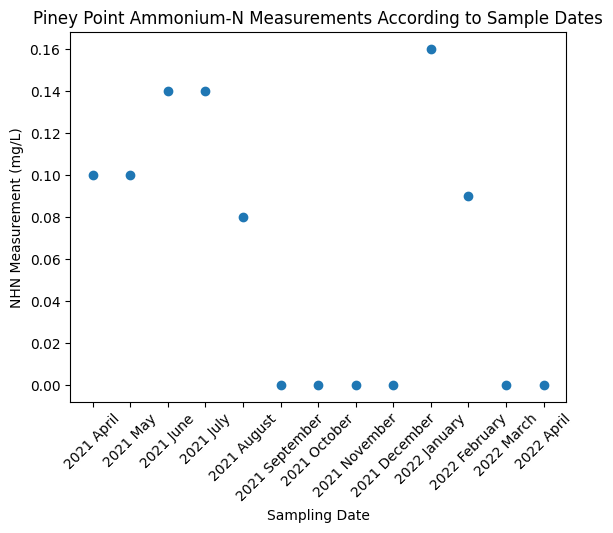

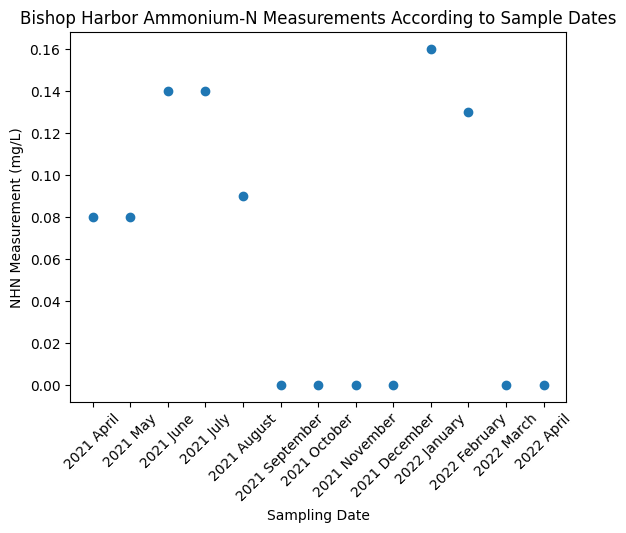

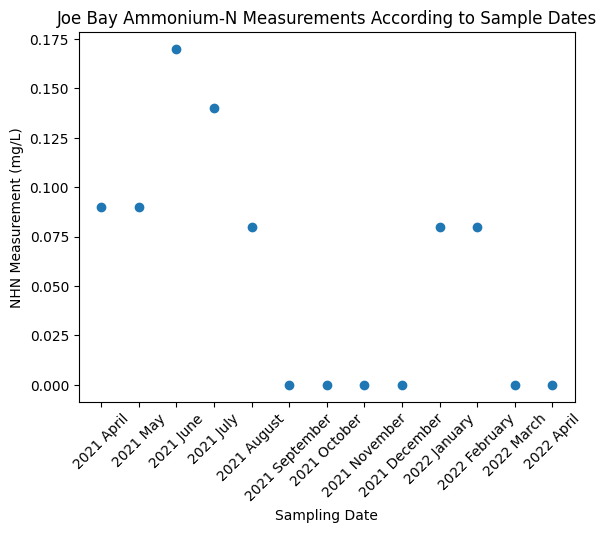

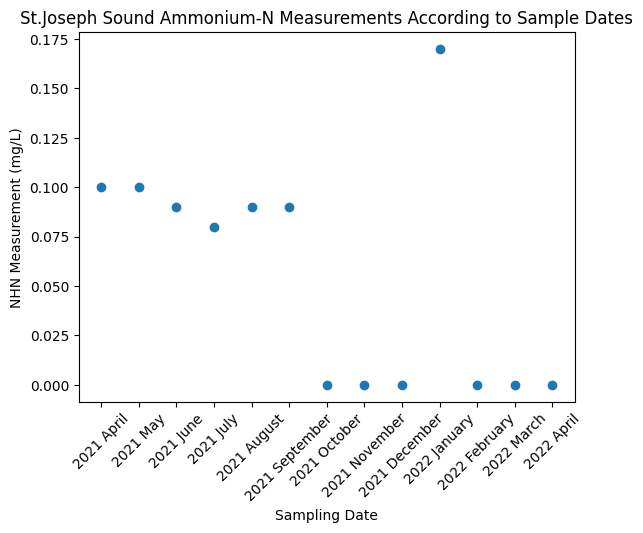

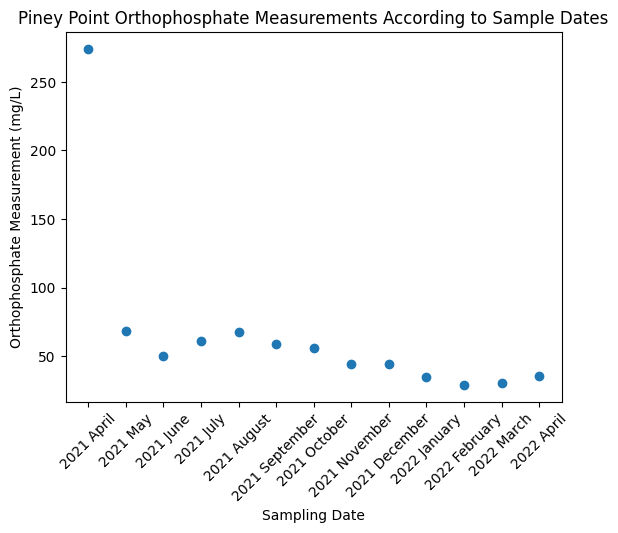

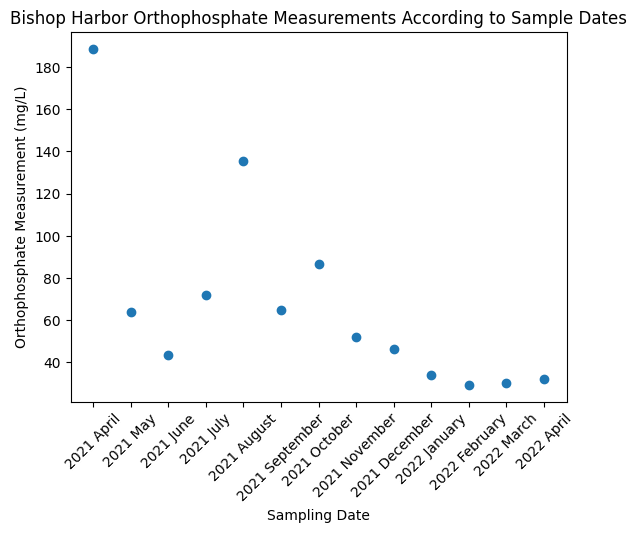

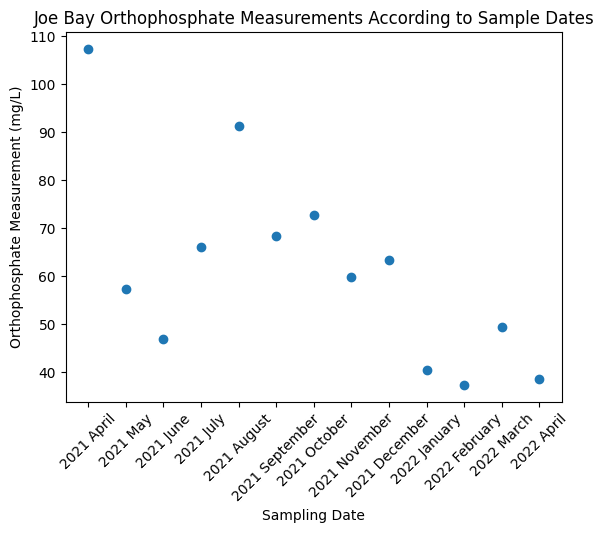

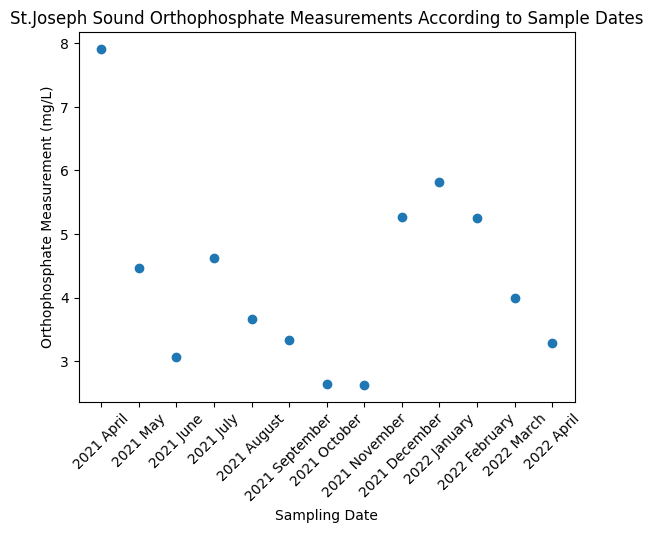

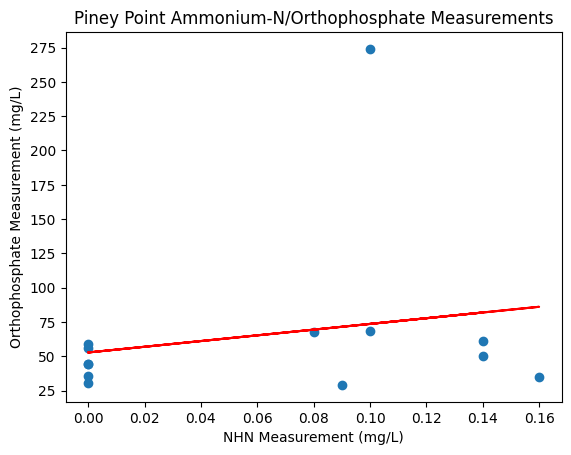

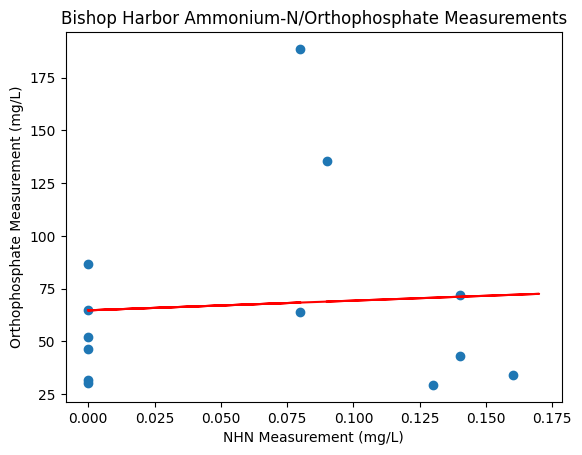

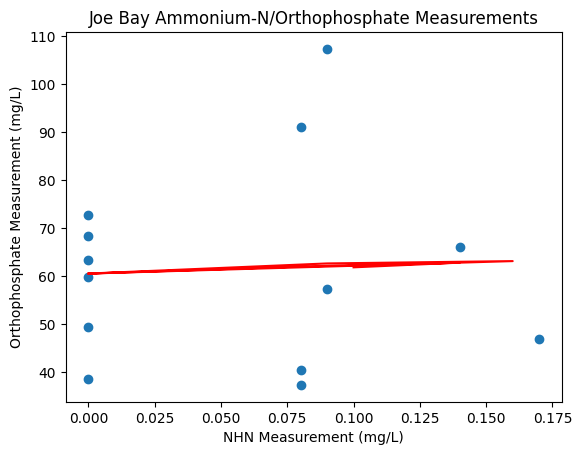

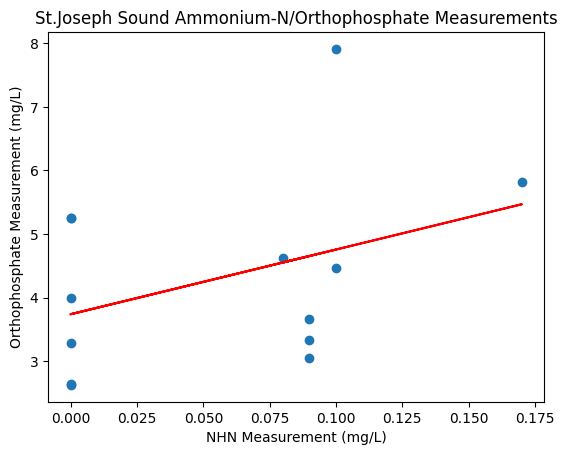

In [2]:
# CORRELATION 3: GENERATE SCATTER PLOTS WITH LINEAR REGRESSION LINES
print('NHN AND ORTHOPHOSPHATE SAMPLE SCATTER PLOTS\n')

# NHN/SAMPLE DATE SCATTER PLOTS FOR THEIR RESPECTIVE LOCATIONS
fig, ax = plt.subplots()
ax.scatter(PP_Sample_dates, Piney_Point_NHN_list)
plt.xticks(rotation = 45)
ax.set_xlabel("Sampling Date")
ax.set_ylabel("NHN Measurement (mg/L)")
plt.title('Piney Point Ammonium-N Measurements According to Sample Dates')

fig, ax = plt.subplots()
ax.scatter(BH_Sample_dates, Bishop_Harbor_NHN_list)
plt.xticks(rotation = 45)
ax.set_xlabel("Sampling Date")
ax.set_ylabel("NHN Measurement (mg/L)")
plt.title('Bishop Harbor Ammonium-N Measurements According to Sample Dates')

fig, ax = plt.subplots()
ax.scatter(JB_Sample_dates, Joe_Bay_NHN_list)
plt.xticks(rotation = 45)
ax.set_xlabel("Sampling Date")
ax.set_ylabel("NHN Measurement (mg/L)")
plt.title('Joe Bay Ammonium-N Measurements According to Sample Dates')

fig, ax = plt.subplots()
ax.scatter(SJS_Sample_dates, St_Joseph_Sound_NHN_list)
plt.xticks(rotation = 45)
ax.set_xlabel("Sampling Date")
ax.set_ylabel("NHN Measurement (mg/L)")
plt.title('St.Joseph Sound Ammonium-N Measurements According to Sample Dates')

# ORTHOPHOSPHATE/SAMPLE DATE SCATTER PLOTS

fig, ax = plt.subplots()
ax.scatter(PP_Sample_dates, Piney_Point_Ortho_P_list)
plt.xticks(rotation = 45)
ax.set_xlabel("Sampling Date")
ax.set_ylabel("Orthophosphate Measurement (mg/L)")
plt.title('Piney Point Orthophosphate Measurements According to Sample Dates')

fig, ax = plt.subplots()
ax.scatter(BH_Sample_dates, Bishop_Harbor_Ortho_P_list)
plt.xticks(rotation = 45)
ax.set_xlabel("Sampling Date")
ax.set_ylabel("Orthophosphate Measurement (mg/L)")
plt.title('Bishop Harbor Orthophosphate Measurements According to Sample Dates')

fig, ax = plt.subplots()
ax.scatter(JB_Sample_dates, Joe_Bay_Ortho_P_list)
plt.xticks(rotation = 45)
ax.set_xlabel("Sampling Date")
ax.set_ylabel("Orthophosphate Measurement (mg/L)")
plt.title('Joe Bay Orthophosphate Measurements According to Sample Dates')

fig, ax = plt.subplots()
ax.scatter(SJS_Sample_dates, St_Joseph_Sound_Ortho_P_list)
plt.xticks(rotation = 45)
ax.set_xlabel("Sampling Date")
ax.set_ylabel("Orthophosphate Measurement (mg/L)")
plt.title('St.Joseph Sound Orthophosphate Measurements According to Sample Dates')

# NHN/ORTHOPHOSTPHATE VALUE SCATTER PLOTS FOR THEIR RESPECTIVE LOCATIONS AND LINEAR REGRESSION LINES OVERLAID
fig, ax = plt.subplots()
ax.scatter(Piney_Point_NHN_list, Piney_Point_Ortho_P_list)
PP_y_ticks = np.arange(0, 301, 25)
ax.set_yticks(PP_y_ticks)
slope, intercept, r_value, p_value, std_err = stats.linregress(Piney_Point_NHN_list, Piney_Point_Ortho_P_list)
regression_line = slope * np_PP_NHN + intercept
plt.plot(np_PP_NHN, regression_line, color='red', label='Linear regression')
ax.set_xlabel("NHN Measurement (mg/L)")
ax.set_ylabel("Orthophosphate Measurement (mg/L)")
plt.title('Piney Point Ammonium-N/Orthophosphate Measurements')

fig, ax = plt.subplots()
ax.scatter(Bishop_Harbor_NHN_list, Bishop_Harbor_Ortho_P_list)
BH_y_ticks = np.arange(0, 200, 25)
ax.set_yticks(BH_y_ticks)
slope, intercept, r_value, p_value, std_err = stats.linregress(Bishop_Harbor_NHN_list, Bishop_Harbor_Ortho_P_list)
regression_line = slope * np_JB_NHN + intercept
plt.plot(np_JB_NHN, regression_line, color='red', label='Linear regression')
ax.set_xlabel("NHN Measurement (mg/L)")
ax.set_ylabel("Orthophosphate Measurement (mg/L)")
plt.title('Bishop Harbor Ammonium-N/Orthophosphate Measurements')

fig, ax = plt.subplots()
ax.scatter(Joe_Bay_NHN_list, Joe_Bay_Ortho_P_list)
JB_y_ticks = np.arange(0, 200, 10)
ax.set_yticks(JB_y_ticks)
slope, intercept, r_value, p_value, std_err = stats.linregress(Joe_Bay_NHN_list, Joe_Bay_Ortho_P_list)
regression_line = slope * np_BH_NHN + intercept
plt.plot(np_PP_NHN, regression_line, color='red', label='Linear regression')
ax.set_xlabel("NHN Measurement (mg/L)")
ax.set_ylabel("Orthophosphate Measurement (mg/L)")
plt.title('Joe Bay Ammonium-N/Orthophosphate Measurements')

fig, ax = plt.subplots()
ax.scatter(St_Joseph_Sound_NHN_list, St_Joseph_Sound_Ortho_P_list)
SJS_y_ticks = np.arange(0, 10, 1)
ax.set_yticks(SJS_y_ticks)
slope, intercept, r_value, p_value, std_err = stats.linregress(St_Joseph_Sound_NHN_list, St_Joseph_Sound_Ortho_P_list)
regression_line = slope * np_SJS_NHN + intercept
plt.plot(np_SJS_NHN, regression_line, color='red', label='Linear regression')
ax.set_xlabel("NHN Measurement (mg/L)")
ax.set_ylabel("Orthophosphate Measurement (mg/L)")
plt.title('St.Joseph Sound Ammonium-N/Orthophosphate Measurements')

In [3]:
# 1 DIMENSIONALITY REDUCTION

# Turn PCA_list into a numpy array and change dimensions of array to accomadate PCA calculations
np_PCA = np.array(PCA_list)
td_PCA = np_PCA.reshape(-1, np_PCA.shape[-1])


# PCA CALCULATION ON ALL NHN AND ORTHOPHOSPHATE MEASUREMENTS
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(td_PCA)
print("Ammonium-N and Orthophosphate principal components including values from all sites:\n", principal_components, "\n")

# 2 DIMENSIONALITY REDUCTION: Extract principle component weights and plot using a bar chart
weight = pca.components_.T * np.sqrt(pca.explained_variance_)
print(weight)

components = weight.shape[1]
features = weight.shape[1]

# Generate bar graphs for each PCA component weight

fig, ax = plt.subplots(components, 1, figsize=(10, 2*num_components))

for num in range(components):
    ax[num].bar(range(features), weight[num])
    ax[num].set_title(f'Principal Component {num + 1} Weights')
    ax[num].set_xlabel('Feature Index')
    ax[num].set_ylabel('Weight')

# Space graphs from overlapping each other
plt.tight_layout()



# 3 DIMENSIONALITY REDUCTION: Visualize your data on PC1 and PC2. Color code data points by relevant categories  
fig, ax = plt.subplots() 
ax.scatter(principal_components[0:12 , 0], principal_components[0:12 , 1], c = "red", label = 'Piney Point')
ax.scatter(principal_components[13:25 , 0], principal_components[13:25 , 1], c = "yellow", label = 'Bishop Harbor')
ax.scatter(principal_components[26:38 , 0], principal_components[26:38 , 1], c = "orange", label = 'Joe Bay')
ax.scatter(principal_components[39:52 , 0], principal_components[39:52 , 1], c = "green", label = 'St.Joseph Sound')
label_X = "PC1 (" + str(np.round(pca.explained_variance_ratio_[0] * 100, decimals = 2)) + "%)"
label_Y = "PC2 (" + str(np.round(pca.explained_variance_ratio_[1] * 100, decimals =2 )) + "%)"
ax.set_xlabel(label_X)
ax.set_ylabel(label_Y)
plt.title("PCA Graph of Ammonium-N Values and Orthophosphate Values From All Sites")
plt.legend()




Ammonium-N and Orthophosphate principal components including values from all sites:
 [[ 2.24248273e+02  8.19088338e-03]
 [ 1.83982750e+01  3.80963660e-02]
 [ 3.98280961e-01  8.07113701e-02]
 [ 1.10882808e+01  7.91583480e-02]
 [ 1.80182721e+01  1.81515719e-02]
 [ 9.02826053e+00 -6.05423778e-02]
 [ 6.10826056e+00 -6.01181659e-02]
 [-5.11173932e+00 -5.84881464e-02]
 [-5.45173932e+00 -5.84387519e-02]
 [-1.45417160e+01  1.02881824e-01]
 [-2.05917261e+01  3.37607565e-02]
 [-1.92617392e+01 -5.64324623e-02]
 [-1.40817392e+01 -5.71850025e-02]
 [ 1.38878271e+02  5.93269080e-04]
 [ 1.39382721e+01  1.87443062e-02]
 [-6.58171897e+00  8.17254108e-02]
 [ 2.20082807e+01  7.75719119e-02]
 [ 8.58882728e+01  1.82915518e-02]
 [ 1.49782605e+01 -6.14067821e-02]
 [ 3.70182602e+01 -6.46087099e-02]
 [ 2.33826060e+00 -5.95704678e-02]
 [-3.54173934e+00 -5.87162329e-02]
 [-1.57517160e+01  1.03057610e-01]
 [-2.04917203e+01  7.37462283e-02]
 [-1.94217392e+01 -5.64092178e-02]
 [-1.79417392e+01 -5.66242293e-02]
 [ 5.

NameError: name 'num_components' is not defined